In [1]:
import os
import subprocess
import datetime as dt
import itertools
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
years=[1991,2023]
basepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/combined/'
savepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/OISST/'
fout=savepath+f'oisst-avhrr-v02r01.regridded1x1.monthly.{years[0]}_{years[-1]}.nc'

In [3]:
fmod='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/anomaly/sst_CanCM4i_l10_anomaly_1991_2020.nc'
fmod=xr.open_dataset(fmod)

In [4]:
fmod

<xarray.Dataset> Size: 2GB
Dimensions:  (X: 360, Y: 181, S: 360, M: 10)
Coordinates:
  * X        (X) float32 1kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y        (Y) float32 724B -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * M        (M) float32 40B 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * S        (S) float32 1kB 372.0 373.0 374.0 375.0 ... 728.0 729.0 730.0 731.0
Data variables:
    lon      (X) float32 1kB ...
    lat      (Y) float32 724B ...
    time     (S) float32 1kB ...
    year     (S) int64 3kB ...
    month    (S) int64 3kB ...
    sst_an   (S, M, Y, X) float64 2GB ...

In [5]:
#get all files
flistM=[]
for iy in range(years[0],years[1]+1):
    for im in range(1,13):
        fM=f'{basepath}oisst-avhrr-v02r01.{iy}{im:02}_monthly.nc'
        flistM.append(fM)

In [6]:
fM=xr.open_mfdataset(flistM,parallel=True)
fM

<xarray.Dataset> Size: 7GB
Dimensions:  (time: 396, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time     (time) datetime64[ns] 3kB 1991-01-16T12:00:00 ... 2023-12-16T12:...
  * zlev     (zlev) float32 4B 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    err      (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    ice      (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    sst      (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
Attributes: (12/38)
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.19910101.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              Grid
    ...                         ...
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    Conventions:                CF-1.6, ACDD-1.3
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    NCO:                        netCDF Operators version 5.0.5 (Homepage = ht...

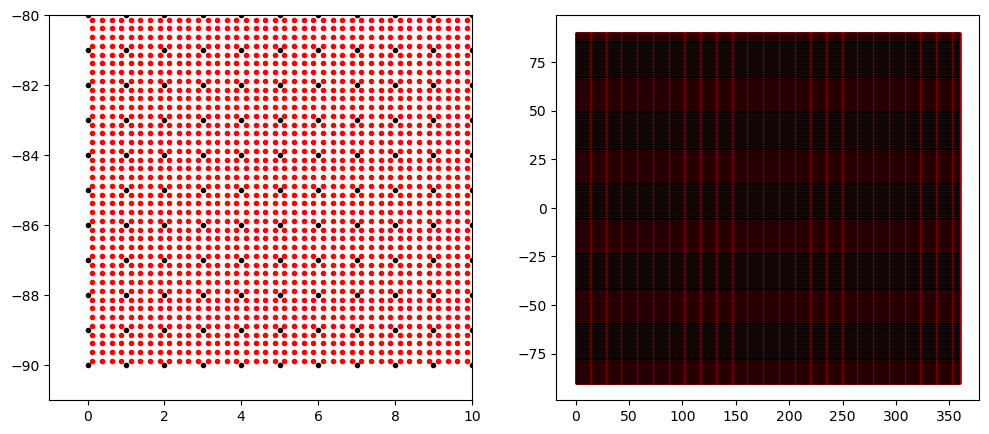

In [7]:
x,y=np.meshgrid(fM.lon,fM.lat)
x2,y2=np.meshgrid(fmod.lon,fmod.lat)
fig,[ax,ax2]=plt.subplots(1,2,figsize=(12,5))
ax.plot(x,y,'r.');
ax.plot(x2,y2,'k.');
ax.set_xlim(-1,10)
ax.set_ylim(-91,-80)
ax2.plot(x,y,'r.',ms=1);
ax2.plot(x2,y2,'k.',ms=1);

In [8]:
fM

<xarray.Dataset> Size: 7GB
Dimensions:  (time: 396, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time     (time) datetime64[ns] 3kB 1991-01-16T12:00:00 ... 2023-12-16T12:...
  * zlev     (zlev) float32 4B 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    err      (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    ice      (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    sst      (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
Attributes: (12/38)
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.19910101.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              Grid
    ...                         ...
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    Conventions:                CF-1.6, ACDD-1.3
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    NCO:                        netCDF Operators version 5.0.5 (Homepage = ht...

In [9]:
data={}
for ivar in ['sst','ice']:
    data[ivar]=fM[ivar].roll({'lon':2}).pad({'lat':2}).coarsen({'lat':4,'lon':4}).mean().data[:,0,:,:]

In [10]:
data0=fM['err']**2
data['err']=data0.roll({'lon':2}).pad({'lat':2}).coarsen({'lat':4,'lon':4}).mean().data[:,0,:,:]**(1/2)

In [11]:
data['err']

dask.array<pow, shape=(396, 181, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>

In [12]:
data['sst']

dask.array<getitem, shape=(396, 181, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>

In [13]:
data['ice']

dask.array<getitem, shape=(396, 181, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>

In [14]:
fM.sst.attrs

{'long_name': 'Daily sea surface temperature',
 'units': 'Celsius',
 'valid_min': np.int16(-300),
 'valid_max': np.int16(4500),
 'cell_methods': 'time: mean'}

In [15]:
fmod.S

<xarray.DataArray 'S' (S: 360)> Size: 1kB
array([372., 373., 374., ..., 729., 730., 731.], shape=(360,), dtype=float32)
Coordinates:
  * S        (S) float32 1kB 372.0 373.0 374.0 375.0 ... 728.0 729.0 730.0 731.0

In [16]:
fmod.time

<xarray.DataArray 'time' (S: 360)> Size: 1kB
[360 values with dtype=float32]
Coordinates:
  * S        (S) float32 1kB 372.0 373.0 374.0 375.0 ... 728.0 729.0 730.0 731.0

In [17]:
Sobs=np.array([fmod.time[0]+ii for ii in range(0,len(fM.time))])
dsout=xr.Dataset(data_vars={'sst':(('S','Y','X'),data['sst'],fM.sst.attrs),
                            'ice':(('S','Y','X'),data['ice'],fM.ice.attrs),
                            'err':(('S','Y','X'),data['err'],fM.err.attrs),
                            'lat':fmod.lat,
                            'lon':fmod.lon,
                            'time':(('S',),fM.time.values),
                            'time2':Sobs,},
                 coords={'S':Sobs,'Y':fmod.Y,'X':fmod.X})

In [18]:
dsout.to_netcdf(fout,'w')

In [19]:
fM.close()
fmod.close()